## Practica 6 
<black>

# 4.1 Creacion de la señal <black>

In [89]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Text(0.5, 0, 'Tiempo(s)')

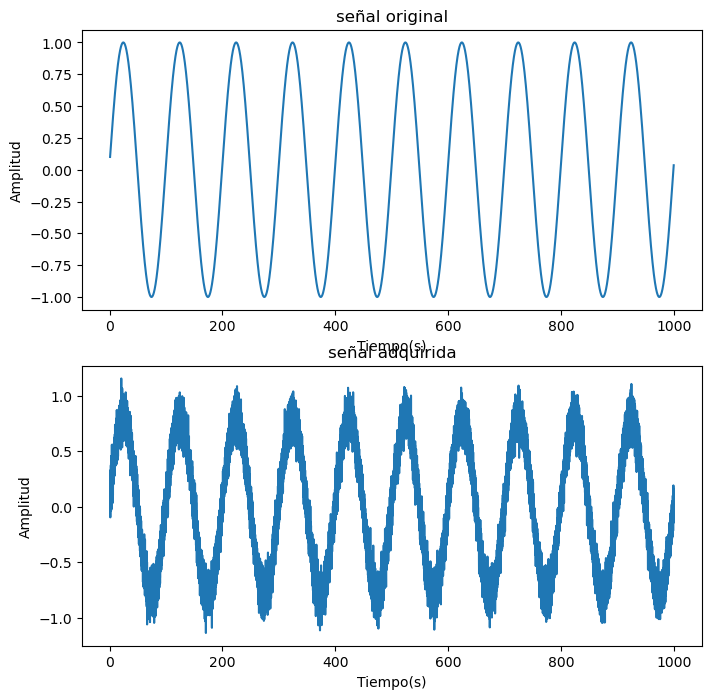

In [87]:
#creacion de señal

F0 = 0.01 # Frecuencia fundamental
Fs = 25 # Frecuencia de muestreo
alfa = 0.8 # atenuacion
D = 15 # Retraso inducido por la adquisicion
var = 0.01 # varianza del ruido
media = 0 # media del ruido
t = np.arange(1,1000,1/Fs) # tiempo
Xe = np.sin(2*np.pi*F0*(n+15/Fs)) # potencial de retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # Ruido gausiano
Ye = alfa*x_e+w # señal con ruido y retraso


#grafica
plt.figure(figsize = (8,8))
plt.subplot(211)
plt.plot(t,Xe)
plt.title('señal original')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo(s)")
plt.subplot(212)
plt.plot(t,Ye)
plt.title('señal adquirida')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo(s)")


# 4.2 Diseño de filtro

Diseñe un filtro FIR pasa bajas para la señal ye(n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

Text(0.5, 0, 'Tiempo(s)')

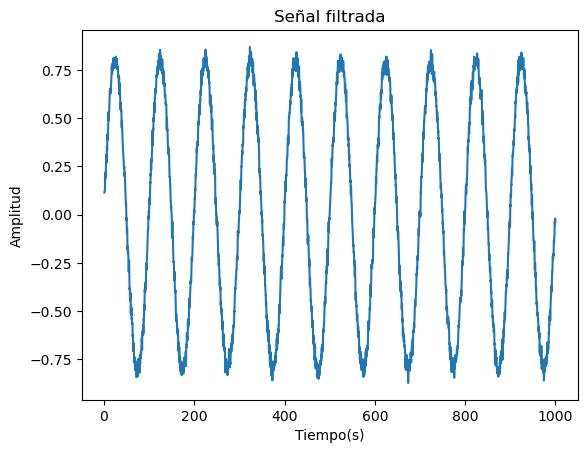

In [90]:
Orden = 30
nyquist = Fs/2
wn_lowpass = 1.25/nyquist # frecuencia de corte normalizada
lowpass = signal.firwin(Orden+1,wn_lowpass,pass_zero = 'lowpass',window ='hamming')
sig_fil_low = signal.filtfilt(b=lowpass,a=1,x=Ye) #filtrado de la señal de entrada mediante el filtro pasababajas y la funcion fiiltfilt
plt.plot(t,sig_fil_low)
plt.title('Señal filtrada')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo(s)')

## Implementacion de pasa altas y pasabajas
<black>


¿Qué cambios hay en los argumentos de la unción para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s

Para implementar un filtro pasa altal se debe cambiar el argunto de la funcion firwin, pass_zero debe ser igualado a 'highpass' en lugar de 'lowpass'. De igual manera para la implementacion de un pasa bandas, dicho argumento debe ser cambiado por 'bandpass'; ademas, se debe especificar las frecuencias d corte mediante el uso de [fmin,fmax], los cuales delimitan los bordes de banda

In [41]:

#Filtro pasaltas
wn_highpass = 7.5/nyquist
highpass = signal.firwin(Orden+1,wn_highpass,pass_zero='highpass',window='hamming')

#Filtro pasabandas
bandpass = signal.firwin(Orden+1,[wn_lowpass,wn_highpass],pass_zero='bandpass',window='hamming')
# Las frecuencias de corte son la frecuencia del filtro pasabajas y pasaltas en sus respectivamente


Duiaeño de filtros IIR

In [71]:
#Pasabajas 
LowpassIIR= b_low,a_low = signal.iirfilter(Orden,wn_lowpass,btype='lowpass')

#Pasaaltas
HighpassIIR = signal.iirfilter(Orden,wn_highpass,btype='highpass')

#Pasabandas
Bandpass = signal.iirfilter(Orden,[wn_lowpass,wn_highpass],btype='bandpass')

## 4.3 Filtrado <black>


Pruebe dichos comandos (filtfilt, lfilter) utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal ye(n) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

Text(0.5, 0, 'Tiempor(s)')

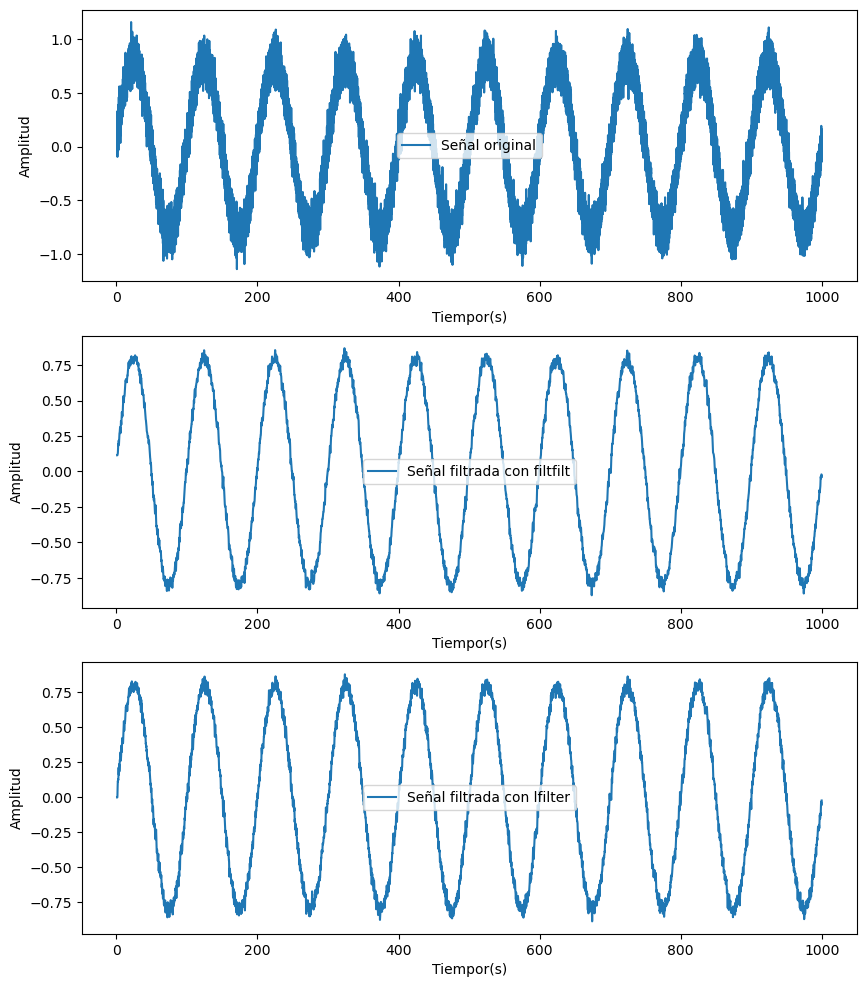

In [91]:
sig_filt = signal.filtfilt(b=lowpass,a=1,x=Ye) #Aplicacion de filtro pasabajas mediante comando filfilt
sig_lfilt = signal.lfilter(b=lowpass,a=1,x=Ye)#Aplicacion de filtro pasabajas mediante comando lfilter
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.plot(t,Ye,label= 'Señal original')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')
plt.subplot(312)
plt.plot(t,sig_filt,label='Señal filtrada con filtfilt')
plt.legend(loc='center',bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')
plt.subplot(313)
plt.plot(t,sig_lfilt,label='Señal filtrada con lfilter')
plt.legend(loc='center',bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')




Para los filtros FIR solo se utiliza el numerador, ya que estos filtros son  solo consideran ceros en su funcion de transferencia para su funcionamiento; esto significa que no tienen polos, debido a esto no se contempla el uso del denominador. La ausencia de polos en el sistema de filtrado brinda una mayor estabilidad a este tipo de filtros, debido a que al estar unicamente definidos por coeficientes del numerador, los filtros FIR no no tienen realimentacion lo que asegura que su respuesta al impulso sea finita [1].

La funcion filtfilt presenta un mejor filtrado que la funcion lfilter. Esto se afirma ya que es observable como la funcion filtfilt, logro reducir en mayor cantidad el ruido presente en la señal y muestra una ligera mejoria en la preservacion de la fase que su homonima; etso podria deberse a que este comando aplica un filtrado en ambas direcciones.  

El filtrado muestra conservacion de la fase y reduccion considerable del ruido o distorsion para ambos casos, lo que permite determinar que a menos que se quiera una mayor prescision no es necesario cambiar el orden del filtro.


Text(0.5, 0, 'Tiempor(s)')

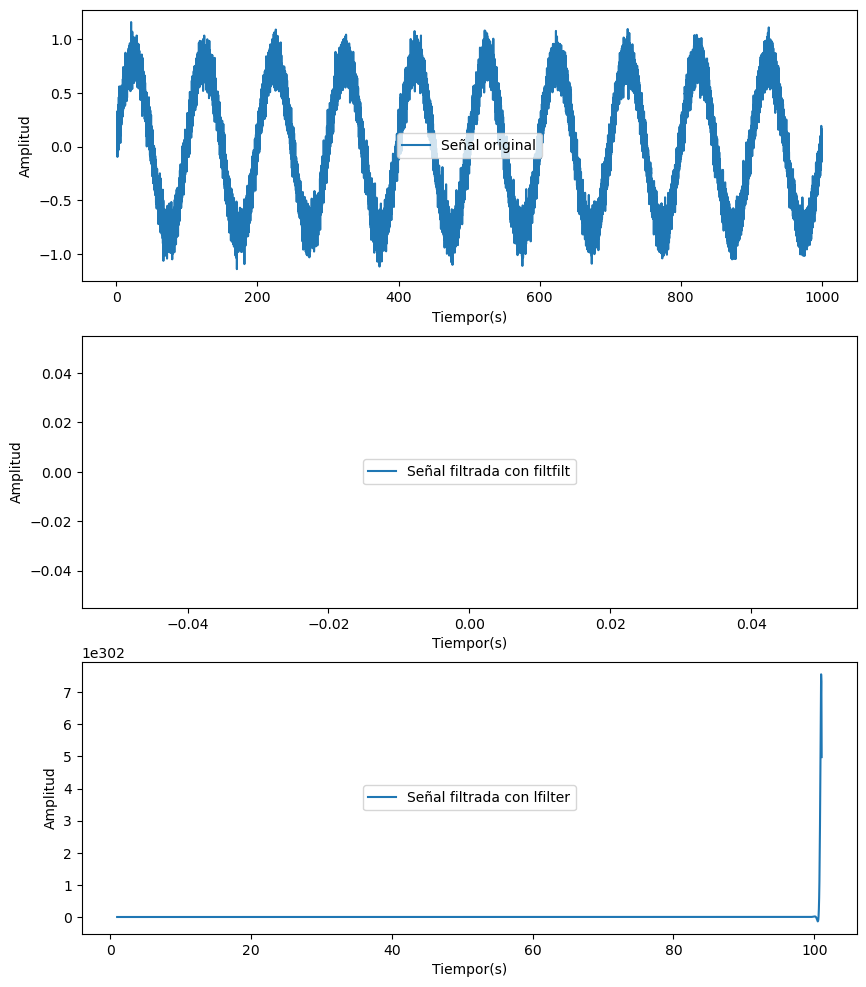

In [92]:
sig_IIR_filt=signal.filtfilt(b=b_low,a=a_low,x=Ye)
sig_IIR_lfilt=signal.lfilter(b=b_low,a=a_low,x=Ye)
plt.figure(figsize=(10,12))
plt.subplot(311)
plt.plot(t,Ye,label= 'Señal original')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')
plt.subplot(312)
plt.plot(t,sig_IIR_filt,label='Señal filtrada con filtfilt')
plt.legend(loc='center',bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')
plt.subplot(313)
plt.plot(t,sig_IIR_lfilt,label='Señal filtrada con lfilter')
plt.legend(loc='center',bbox_to_anchor=(0.5, 0.5), ncol=1)
plt.ylabel('Amplitud')
plt.xlabel('Tiempor(s)')

## 4.4 Aplicacion <black>
    
   -Realice un análisis frecuencial con la función que permite calcular el     
     periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? 
     Analice
    
   -Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. 
     Luego verifique nuevamente el comportamiento en frecuencia (periodograma  
     de Welch de la señal filtrada) ¿Hay cambios? Analice.
    
   -Grafique un segmenteo de las señales antes y después de filtrar, analice 
     los cambios.
    

In [95]:
from scipy.signal import welch
from scipy.signal import firwin, lfilter

#Cargar la señal

signal = np.loadtxt(r"C:\Users\Juan Melo\Desktop\bioseñales\senal_filtros.txt")

#Extraccion del canal de interes de las señales provistas

canal = signal[:,0]
print('Dimesnsion de señal cargada'),canal.shape # corroboracion de la dimension 


Dimesnsion de señal cargada


(None, (60000,))

## Estudio en frecuencia mediante el periodograma de Welch <black>

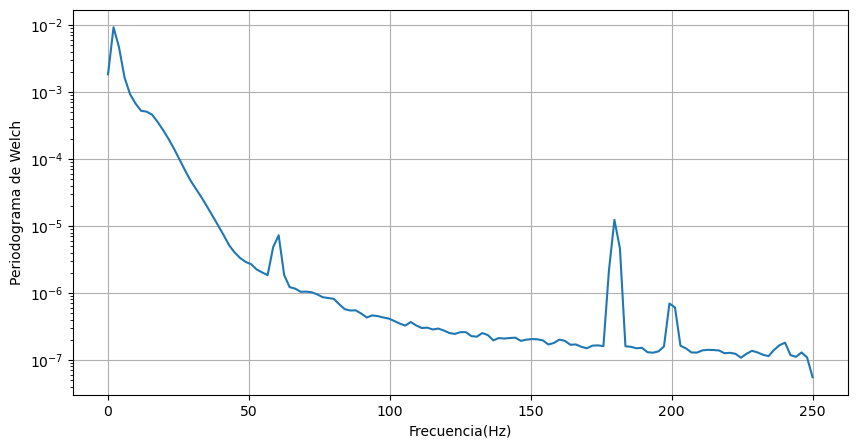

In [97]:
Fs = 500 # Determinacion de fecuencia

#calculo del periodograma de Welch
frecuencias, poder_spectral = welch(canal,Fs)
#grafico del periodograma obtenido
plt.figure(figsize=(10,5))
plt.semilogy(frecuencias,poder_spectral)
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('Periodograma de Welch')
plt.grid(True)


Una señal sin ruido presente en ella se caracteriza por tener una densidad espectral de potencia(DSP) con curvas suavizadas y continuas. En el periodograma de Welch obtenido se logra evidenciar picos que representan cambios abruptos en el DSP, lo cual indicaria presencia de ruido electrico, ya que este se caracteriza por presentar cambios abruptos en su amplitud y espectro a lo largo del tiempo [2].

## Implementacion de filtro FIR-Aplicacion Periodograma de Welch <black>

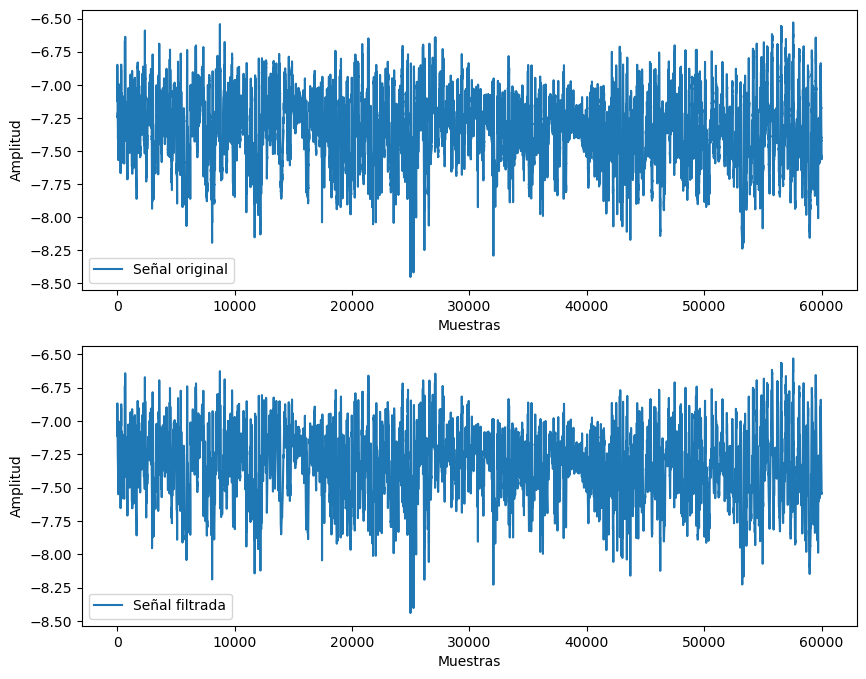

In [111]:
# Diseño de filtro FIR para eliminar el ruido de la señal 
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Fsr = 50 #Hz
Orden = 30
nyquist = Fs/2
wn_lowpass = Fsr/nyquist # frecuencia de corte normalizada
lowpass = signal.firwin(Orden+1,wn_lowpass,pass_zero = 'lowpass',window ='hamming')
sig_fil_low = signal.filtfilt(b=lowpass,a=1,x=canal) #filtrado de la señal de entrada mediante el
#Aplicacion de filtro FIR
canal_filtrado = signal.filtfilt(b=lowpass,a=1,x=canal)

#Grafica de la originalVS señal filtrada
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(canal,label= 'Señal original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.subplot(212)
plt.plot(canal_filtrado,label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()



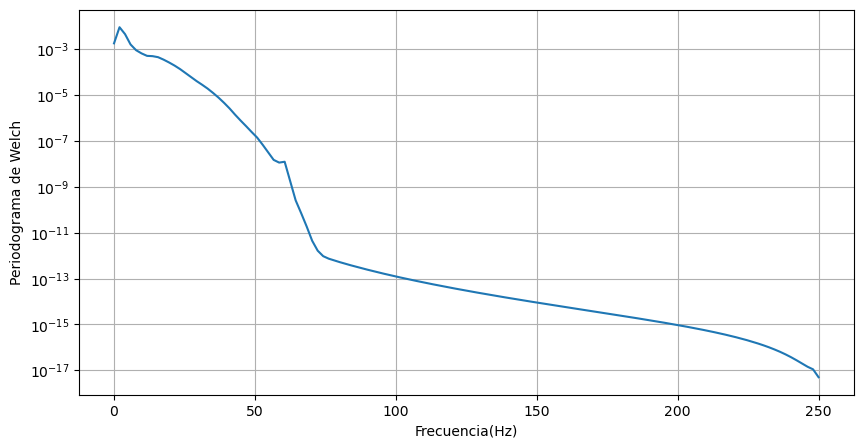

In [112]:
#Estimacion del periodograma de Welch a la señal filtrada previamente

Fwfilt,PSfilt = welch(canal_filtrado,Fs)
plt.figure(figsize=(10,5))
plt.semilogy(Fwfilt,PSfilt)
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('Periodograma de Welch')
plt.grid(True)


## Comparacion de la Señal original y la filtrada <black>

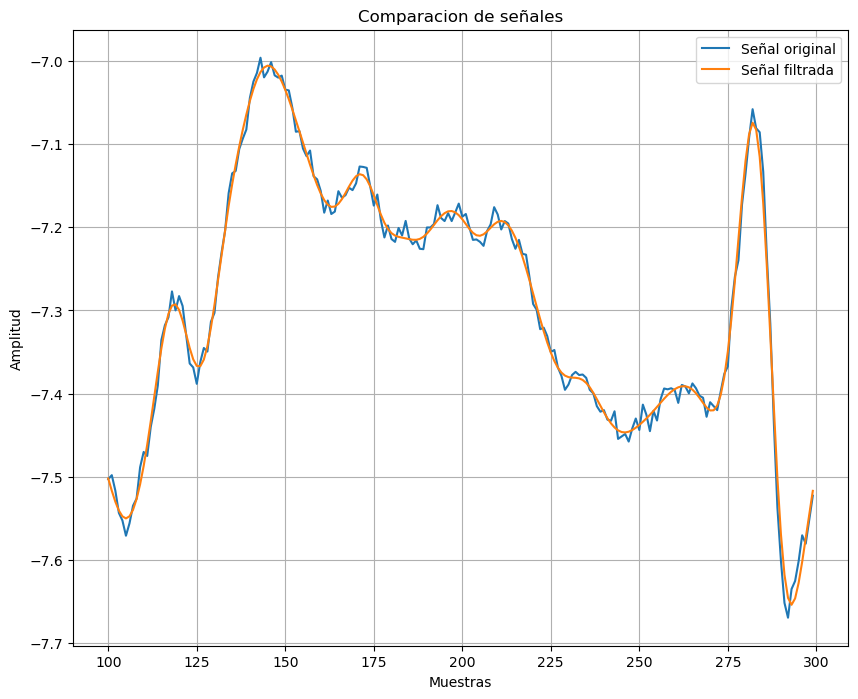

In [118]:
#Deficion del intervalo a graficar

Inicio = 100
Fin = 300

#Gracia comparativa de la señal original VS la señal filtrada

plt.figure(figsize=(10,8))
plt.plot(np.arange(Inicio,Fin), canal[Inicio:Fin],label='Señal original')
plt.plot(np.arange(Inicio,Fin),canal_filtrado[Inicio:Fin],label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Comparacion de señales')
plt.grid(True)

La señal filtrada presenta reduccion de ruido presente en los picos y curvaturas presentes en la señal original. Ademas, al eliminar las disrtosiones antes mencionadas se logro obtener una mejor continuidad y menor presencia de valores atipicos y cambios abruptos en el periodograma de welch; permitiendo observar asi el periodograma de una señal sin ruido.

La señal filtrada conserva bien la fase de la señal original, debido a que mediante el comando 'filtfilt' se aplico un filtrado simetrico a la señal de origen lo cual permitio obtener resultados de fase fidegdignos.

## Referencias <black>
    
    [1]Editorial Redipe. Accedido el 25 de octubre de 2024. [En línea]. 
    Disponible: https://editorial.redipe.org/index.php/1/catalog/download/129/229/4653?inline=1
    
    [2] Dialnet. Accedido el 25 de octubre de 2024. [En línea]. Disponible: https://dialnet.unirioja.es/descarga/articulo/4803754.pdf